In [1]:
from fastai.vision.all import*

In [22]:
path = Path.home()/'git/paddy-disease-classification'
trn_path = path/'train_images'

In [24]:
path.ls()
trn_path.ls()

(#10) [Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight'),Path('/root/git/paddy-disease-classification/train_images/downy_mildew'),Path('/root/git/paddy-disease-classification/train_images/bacterial_panicle_blight'),Path('/root/git/paddy-disease-classification/train_images/blast'),Path('/root/git/paddy-disease-classification/train_images/dead_heart'),Path('/root/git/paddy-disease-classification/train_images/hispa'),Path('/root/git/paddy-disease-classification/train_images/tungro'),Path('/root/git/paddy-disease-classification/train_images/brown_spot'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_streak'),Path('/root/git/paddy-disease-classification/train_images/normal')]

In [25]:
blb = trn_path/'bacterial_leaf_blight'

In [18]:
df = pd.read_csv(path/'train.csv')
df

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45
...,...,...,...,...
10402,107607.jpg,tungro,Zonal,55
10403,107811.jpg,tungro,Zonal,55
10404,108547.jpg,tungro,Zonal,55
10405,110245.jpg,tungro,Zonal,55


In [28]:
files = get_image_files(trn_path)
files

(#10407) [Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/104800.jpg'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/101176.jpg'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/105031.jpg'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/105948.jpg'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/109975.jpg'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/100925.jpg'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/103637.jpg'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/100023.jpg'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/109121.jpg'),Path('/root/git/paddy-disease-classification/train_images/bacterial_leaf_blight/104975.jpg')...]

In [30]:
img = PILImage.create(files[0])
[PILImage.create(o).size for o in files[:10]]

[(480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640)]

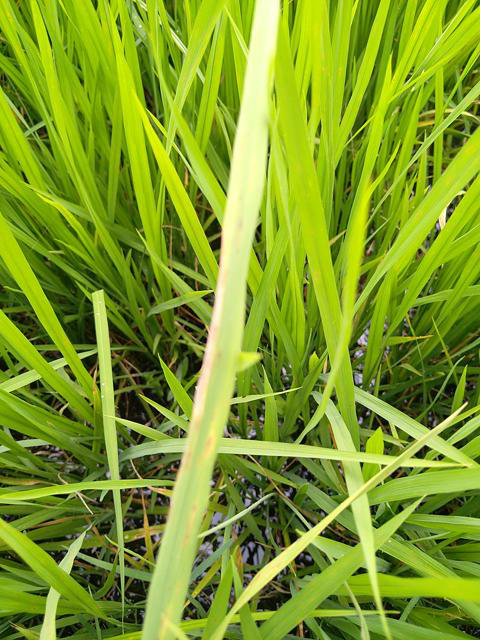

In [31]:
img

In [32]:
df.variety.value_counts()

variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

In [33]:
def is_cat(x): return x[0].isupper()

In [36]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))


/root/mambaforge/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [37]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.904382,1.063415,0.330130,12:19


epoch,train_loss,valid_loss,error_rate,time
0,0.731776,0.441053,0.136473,18:29


In [ ]:
learn.lr_find()

In [59]:
tst_files = get_image_files(path/'test_images')
tst_files.sort()
tst_dl = dls.test_dl(tst_files)

In [60]:
preds = learn.get_preds(dl=tst_dl, with_decoded=True)
probs,_,idxs = preds
idxs = pd.Series(idxs.numpy(), name='idxs')

/root/mambaforge/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [61]:
mapping = {k:v for k,v in enumerate(dls.vocab)}

In [62]:
results = idxs.map(mapping)

In [63]:
ss = pd.read_csv(path/'sample_submission.csv')

In [64]:
ss['label'] = results

In [65]:
learn.show_results

<bound method Learner.show_results of <fastai.learner.Learner object at 0x7fdd04e59060>>

In [66]:
ss.to_csv('subm.csv', index=False)

In [67]:
!head subm.csv

image_id,label
200001.jpg,hispa
200002.jpg,normal
200003.jpg,blast
200004.jpg,blast
200005.jpg,blast
200006.jpg,brown_spot
200007.jpg,dead_heart
200008.jpg,brown_spot
200009.jpg,hispa
